In [2]:
import pandas as pd

In [3]:
# Load the dataset
file_path = 'Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241129.csv'
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [4]:
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0  


In [5]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [6]:
# Fill missing values in 'Other' column with the column's mean
data['Other'].fillna(data['Other'].mean(), inplace=True)

# Verify that there are no missing values left
print("Missing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_7512\3212045083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Other'].fillna(data['Other'].mean(), inplace=True)


In [7]:
# Check for duplicates and remove if any
print("\nNumber of duplicate rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [8]:
data.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.528539
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,15.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,41.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,67.750000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [9]:
# Convert 'Date' column to datetime format (if not already done)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extract useful components from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6
data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Verify the changes
print("New columns added:")
print(data[['Year', 'Month', 'Day', 'Day_of_Week', 'Is_Weekend']].head())


New columns added:
   Year  Month  Day  Day_of_Week  Is_Weekend
0  2024      8   30            4           0
1  2023      9   15            4           0
2  2021     12   28            1           0
3  2023      1   11            2           0
4  2021      9   11            5           1


In [10]:
# Create a new feature for total passengers
data['Total_Passengers'] = data[['Local Route', 'Light Rail', 'Peak Service', 
                                 'Rapid Route', 'School', 'Other']].sum(axis=1)

# Verify the changes
print("Preview of Total_Passengers feature:")
print(data[['Local Route', 'Light Rail', 'Peak Service', 
            'Rapid Route', 'School', 'Other', 'Total_Passengers']].head())


Preview of Total_Passengers feature:
   Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
0        16436       10705           225        19026    3925   59.0   
1        15499       10671           267        18421    4519   61.0   
2         1756        2352             0         3775       0   13.0   
3        10536        8347           223        14072       0   48.0   
4          820         612             0         1283       0   11.0   

   Total_Passengers  
0           50376.0  
1           49438.0  
2            7896.0  
3           33226.0  
4            2726.0  


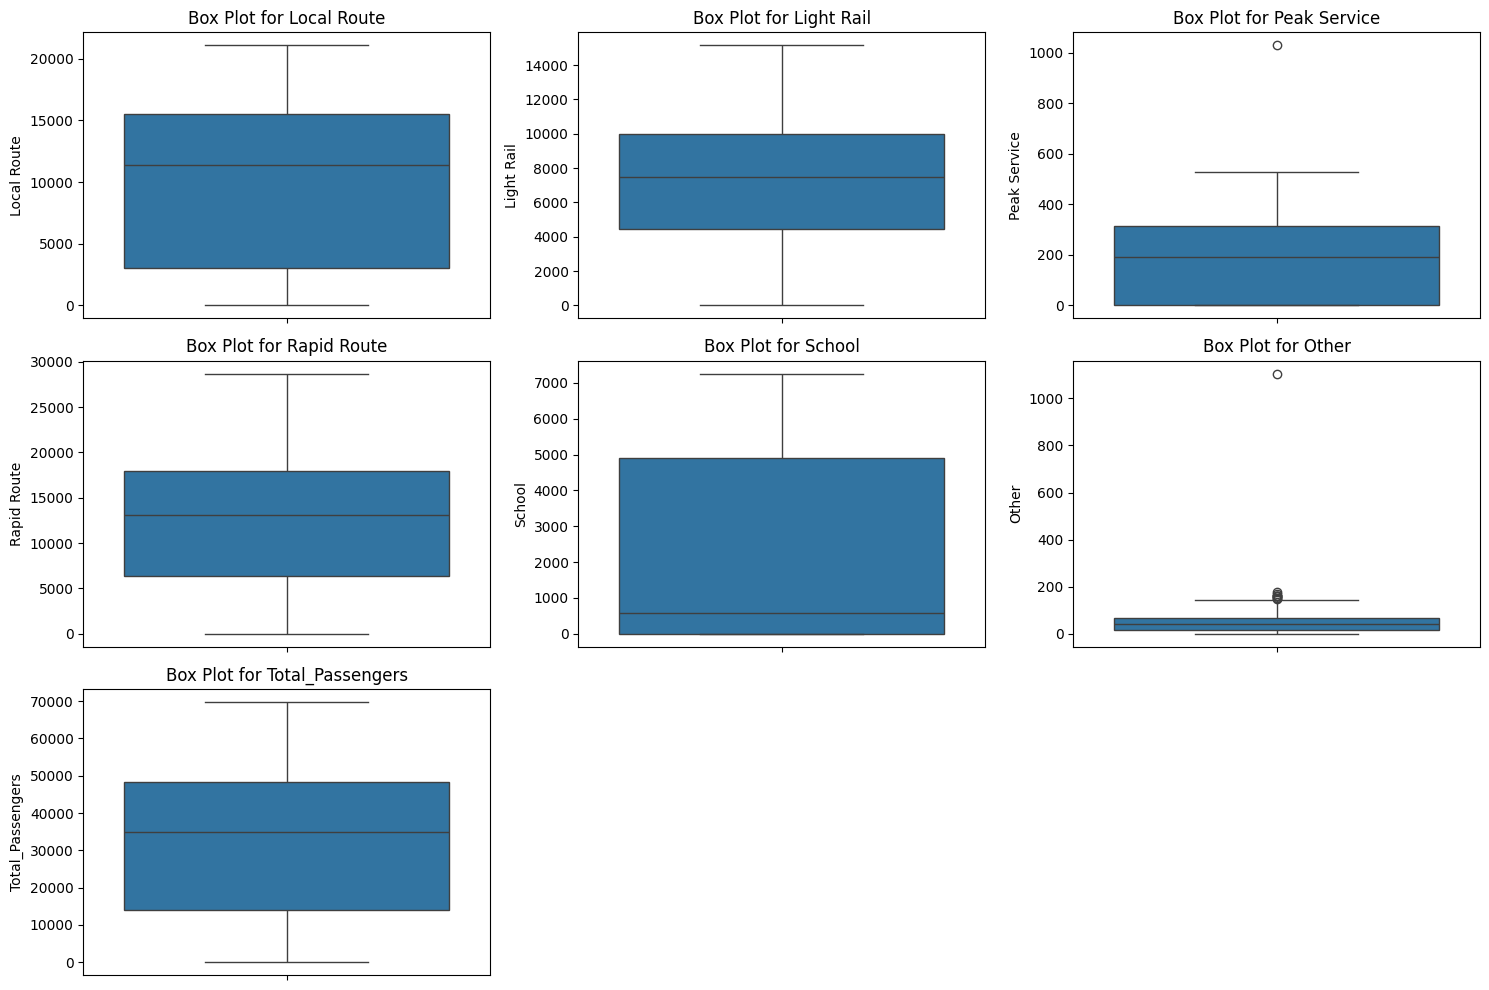

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to visualize for outliers
outlier_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other', 'Total_Passengers']

# Create box plots to visualize the outliers in each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(outlier_columns, 1):
    plt.subplot(3, 3, i)  # Create a grid of subplots (3x3)
    sns.boxplot(data=data[feature])
    plt.title(f'Box Plot for {feature}')
    plt.tight_layout()

plt.show()


In [12]:
def detect_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index.tolist()
    
    return outliers

# Columns to check for outliers
outlier_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other', 'Total_Passengers']

# Detect outliers
outliers = detect_outliers(data, outlier_columns)

# Print the outliers detected for each column
print("Outliers detected in the following columns:")
for feature, indices in outliers.items():
    if indices:
        print(f"{feature}: {len(indices)} outliers")

Outliers detected in the following columns:
Peak Service: 1 outliers
Other: 10 outliers


In [21]:
import pandas as pd

# Create a 'Date' column by combining 'Year', 'Month', and 'Day'
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Aggregate the data by the 'Date' column
daily_data = data.groupby('Date').agg({
    'Local Route': 'sum',
    'Light Rail': 'sum',
    'Peak Service': 'sum',
    'Rapid Route': 'sum',
    'School': 'sum',
    'Total_Passengers': 'sum'
}).sort_index()

# If you want to ensure there are no missing dates in the time series, reindex the data
daily_data = daily_data.reindex(pd.date_range(start=daily_data.index.min(), end=daily_data.index.max(), freq='D'), fill_value=0)

# Display the first few rows of the aggregated daily data
print(daily_data.head())


            Local Route  Light Rail  Peak Service  Rapid Route  School  \
2019-07-01        15987        9962           407        21223    3715   
2019-07-02        16895       10656           409        21715    3993   
2019-07-03        16613       10658           427        22025    3638   
2019-07-04        16604       10445           437        21868    3576   
2019-07-05        16040       10532           400        20697    2856   

            Total_Passengers  
2019-07-01      51337.390411  
2019-07-02      53711.390411  
2019-07-03      53404.390411  
2019-07-04      52973.390411  
2019-07-05      50568.390411  


Forecasting for Local Route...


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_7512\762584350.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df[service_type] = forecast_df[service_type].replace(0, pd.NA).fillna(method='ffill')


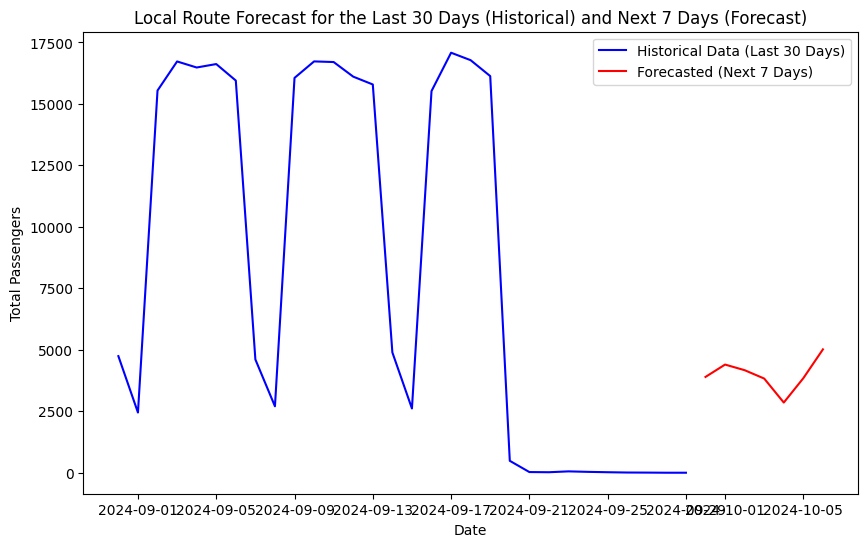

Forecasting for Light Rail...


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_7512\762584350.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df[service_type] = forecast_df[service_type].replace(0, pd.NA).fillna(method='ffill')


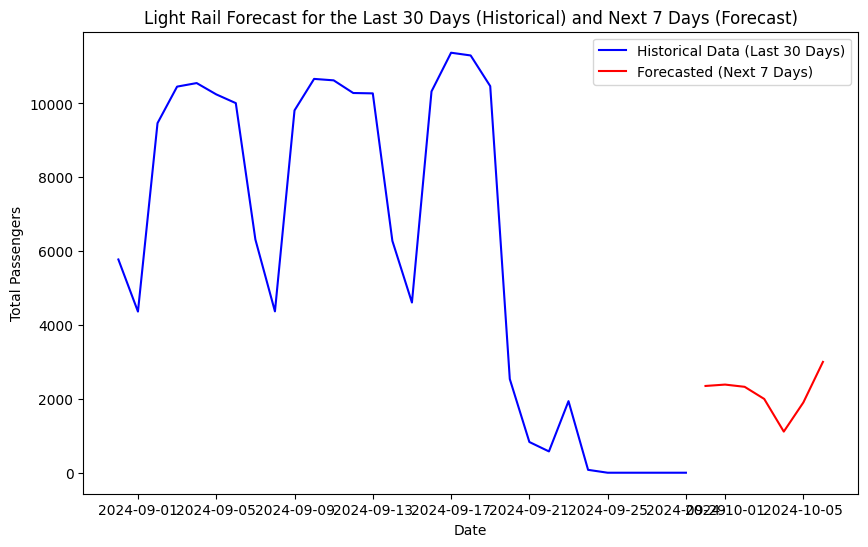

Forecasting for Peak Service...


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_7512\762584350.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df[service_type] = forecast_df[service_type].replace(0, pd.NA).fillna(method='ffill')


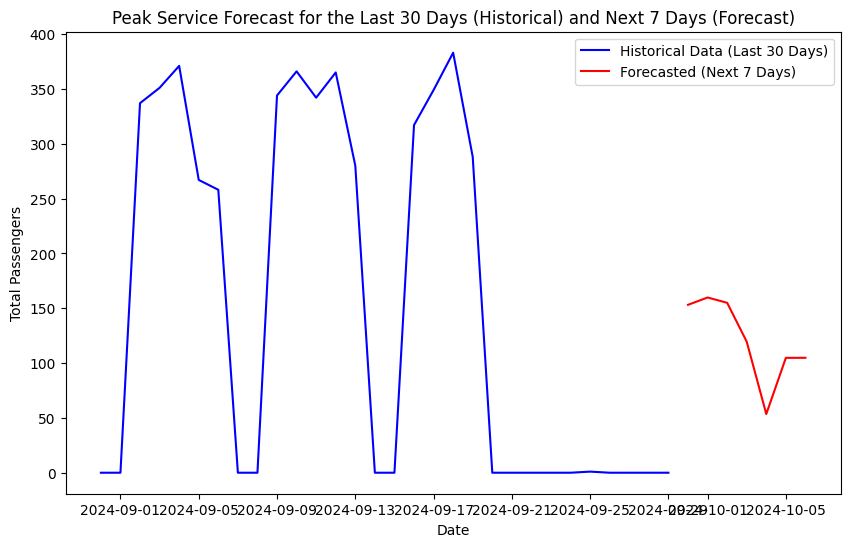

Forecasting for Rapid Route...


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_7512\762584350.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df[service_type] = forecast_df[service_type].replace(0, pd.NA).fillna(method='ffill')


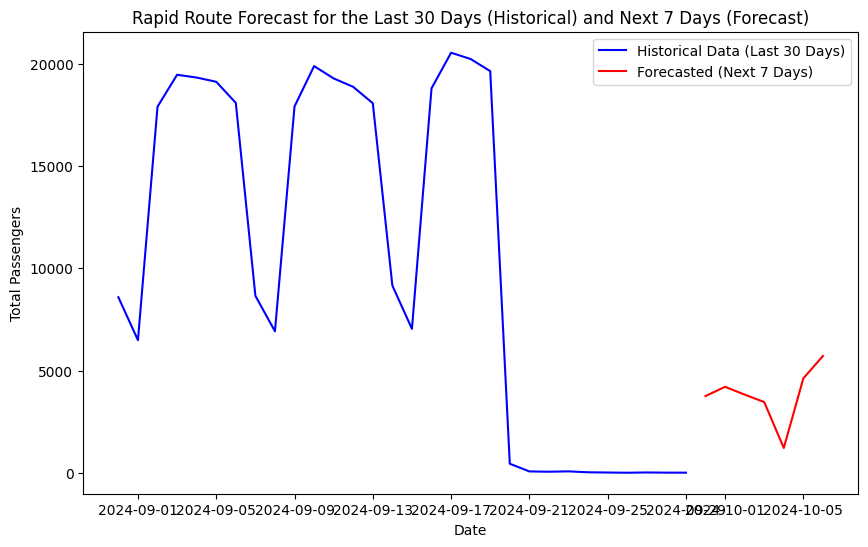

Forecasting for School...


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_7512\762584350.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df[service_type] = forecast_df[service_type].replace(0, pd.NA).fillna(method='ffill')


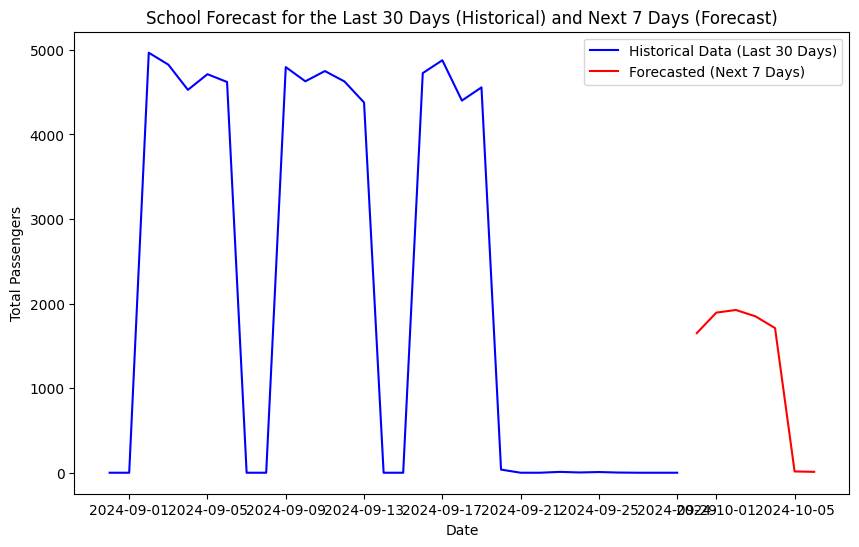

Forecasting for Total_Passengers...


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_7512\762584350.py:47: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forecast_df[service_type] = forecast_df[service_type].replace(0, pd.NA).fillna(method='ffill')


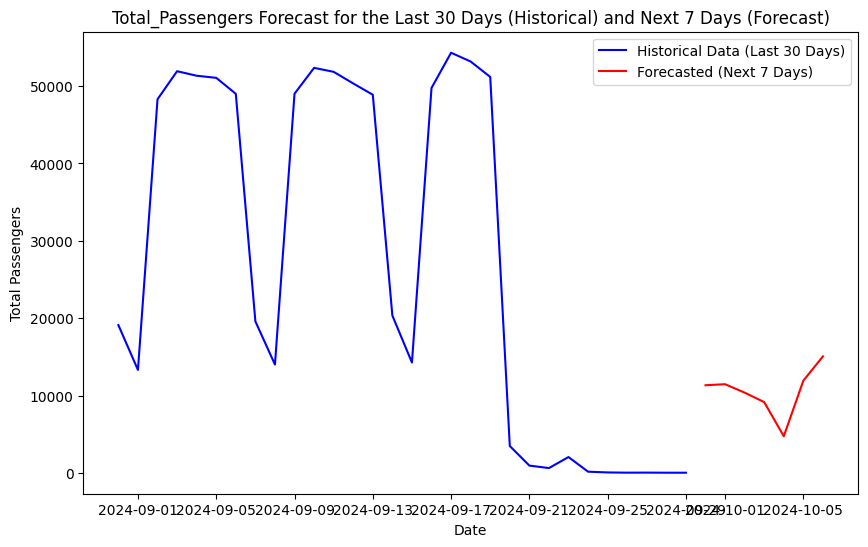

Forecasted Data for the Next 7 Days:
            Local Route   Light Rail  Peak Service  Rapid Route       School  \
Date                                                                           
2024-09-30  3896.785351  2349.691198    153.086729  3750.284374  1650.686590   
2024-10-01  4399.216707  2386.912791    159.792136  4203.638653  1893.332088   
2024-10-02  4170.407290  2326.404270    154.966548  3822.171605  1924.669886   
2024-10-03  3830.040963  1998.235724    119.515124  3457.604924  1849.291425   
2024-10-04  2853.942847  1113.799837     53.517174  1211.024040  1710.668580   
2024-10-05  3846.461447  1902.860145    104.753032  4619.302197    15.040702   
2024-10-06  5017.471240  3001.537549    104.803909  5711.856679    10.439694   

            Total_Passengers  
Date                          
2024-09-30      11350.422506  
2024-10-01      11483.378584  
2024-10-02      10397.100155  
2024-10-03       9169.729789  
2024-10-04       4760.405059  
2024-10-05      11944.109

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'daily_data' is your dataset with Date as the index and service types as columns

# Initialize a DataFrame to store all forecast results
all_forecasts = pd.DataFrame()

# Loop through each service type and generate forecasts
for service_type in daily_data.columns:
    print(f"Forecasting for {service_type}...")

    # Get the data for the service type
    data_service = daily_data[service_type]

    # Get the last 7 days of data for historical data
    historical_data = data_service[-7:]

    # Fit SARIMAX model (you can tune the order parameters based on ACF/PACF)
    model = SARIMAX(data_service, 
                    order=(1, 1, 1),  # ARIMA(p,d,q) order
                    seasonal_order=(1, 1, 1, 7),  # Seasonal order for weekly seasonality (7 days)
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    # Fit the model
    model_fit = model.fit(disp=False)

    # Forecast for the next 7 days
    forecast_steps = 7
    forecast = model_fit.forecast(steps=forecast_steps)

    # Generate future dates for the forecasted period
    forecast_dates = pd.date_range(daily_data.index[-1] + pd.DateOffset(days=1), periods=forecast_steps, freq='D')

    # Create a DataFrame to store the forecasted results for the current service type
    forecast_df = pd.DataFrame({
        'Date': forecast_dates,
        service_type: forecast
    })

    # Handle negative values: Replace any negative values with their absolute value
    forecast_df[service_type] = forecast_df[service_type].apply(lambda x: abs(x) if x < 0 else x)

    # Forward fill to replace zeroes with previous valid value (if any)
    forecast_df[service_type] = forecast_df[service_type].replace(0, pd.NA).fillna(method='ffill')

    # Append the forecast to the master forecast DataFrame
    all_forecasts = pd.concat([all_forecasts, forecast_df.set_index('Date')], axis=1)

    # Plot the results (only showing last 30 days of historical and next 7 days of forecast)
    plt.figure(figsize=(10, 6))
    plt.plot(daily_data.index[-30:], daily_data[service_type].tail(30), label='Historical Data (Last 30 Days)', color='blue')
    plt.plot(forecast_df['Date'], forecast_df[service_type], label='Forecasted (Next 7 Days)', color='red')
    plt.title(f'{service_type} Forecast for the Last 30 Days (Historical) and Next 7 Days (Forecast)')
    plt.xlabel('Date')
    plt.ylabel('Total Passengers')
    plt.legend()
    plt.show()

# Display the forecasted results as a table
print("Forecasted Data for the Next 7 Days:")
print(all_forecasts)
